In [30]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [2]:
with np.load('mnist.npz', allow_pickle=True) as f: 
    train_x, train_y = f['x_train'], f['y_train']
    test_x, test_y = f['x_test'], f['y_test']
print(train_x.shape, train_y.shape)

(60000, 28, 28) (60000,)


label is 4


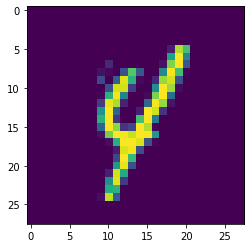

In [3]:
index = 3457
print('label is %d' % train_y[index])
plt.imshow(train_x[index])
plt.show()

In [4]:
np.min(train_x[index]), np.max(train_x[index]), np.mean(train_x[index])

(0, 255, 19.855867346938776)

In [5]:
train_x_1 = train_x.reshape(len(train_x), -1)
print(train_x_1.shape)

test_x_1 = test_x.reshape(len(test_x), -1)
print(test_x_1.shape)

(60000, 784)
(10000, 784)


In [10]:
class DummyClassifier(object):
    def __init__(self):
        self.name = 'Dummy'
    def fit(self, train_x, train_y):
        pass
    def predict(self, test_x):
        return np.random.randint(low=0, high=10, size=len(test_x))
    
    

In [12]:
classifier = DummyClassifier()
classifier.fit(train_x_1, train_y)
pred = classifier.predict(test_x_1)

In [13]:
def accuracy(pred, gt):
    return np.sum(pred == gt)/len(gt)

In [14]:
acc = accuracy(pred, test_y)
print(acc)

0.1101


In [15]:
from sklearn.metrics import accuracy_score

In [16]:
accuracy_score(pred, test_y)

0.1101

In [17]:
from sklearn.neighbors import KNeighborsClassifier

In [18]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:2000], train_y[:2000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.86
3 0.9
5 0.9
7 0.89
9 0.9


In [19]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:3000], train_y[:3000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.89
3 0.94
5 0.93
7 0.9
9 0.9


In [20]:
results = []
for k in range(1,10, 2):
    classifier = KNeighborsClassifier(n_neighbors=k)
    classifier.fit(train_x_1[:10000], train_y[:10000])
    pred = classifier.predict(test_x_1[:100])
    acc = accuracy_score(pred, test_y[:100])
    results.append(acc)
    print(k, acc)

1 0.92
3 0.95
5 0.95
7 0.94
9 0.96


In [22]:
from sklearn.cluster import KMeans

In [23]:
km = KMeans(n_clusters=20)
km.fit(train_x_1[:10000])


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=20, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [ ]:
for cluster in km.cluster_centers_:
    plt.imshow(cluster.reshape(28,28))
    plt.show()

#### Задача 1

Подобрать оптимальные параметры для KNeighborsClassifier.
В качестве решения необходимо отправить код подбора параметров в этом ноутбуке seminar03_knn.ipynb и параметры лучшего классификатора knn_best_params.pkl

#### Задача 2

Найти 10 эталонов, чтобы качество классификации было максимальным. (Преодолеть 70%)

В качестве решения необходимо отправить код поиска эталонов в этом ноутбуке seminar03_knn.ipynb и файл с 10 эталонами knn_10_best.npy


#### Задача 3*

Сколько эталонов нужно, чтобы преодолеть 90% точность?
Задача не является обязательной, в качестве решения необходимо предоставить код с решением

#### Ноутбук с решением необходимо сдать отправить боту @ml2021sharebot c пометкой seminar03

### Решение задачи 1

In [ ]:
# ваше решение задачи 1

In [32]:
# сохраните параметры лучшего классификатора
with open("knn_best_params.pkl", "wb") as f:
    pickle.dump(best_classifier.get_params(), f)



### Решение задачи 2

In [ ]:
# ваше решение задачи 2

In [34]:
etalons_10 = np.zeros((10, 784))
np.save('knn_10_best', etalons_10)

### Решение задачи 3

In [ ]:
# ваше решение задачи 3